# *Análisis del Sector Telecomunicaciones en Argentina: Acceso a Internet*

## Selección de Datasets Apropiados para el Análisis
**Los datatset originales los encontramos en la pagina oficial de ENACOM: Acceso a Internet. Información de mercado, oferta, demanda y cobertura de los servicios de comunicaciones (2022).**

**LINK: https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/**

**Para abordar el análisis completo del sector de las telecomunicaciones a nivel nacional, considerando que la empresa principal se centra en brindar acceso a Internet, sería recomendable utilizar varios de los datasets proporcionados para obtener una visión holística del panorama. A continuación, se describen los datasets seleccionados y su relevancia para cada aspecto del análisis:**

### Exploración General:
- **Penetración de Internet Fijo (accesos por cada 100 hogares) (Dataset 1):** Proporciona un panorama general de la penetración de Internet fijo en cada provincia al mostrar el porcentaje de hogares conectados.
- **Total Nacional de Accesos a Internet Fijo por Banda Ancha y Banda Angosta (Dataset 2):** Permite entender la distribución nacional entre banda ancha y banda angosta, brindando una visión completa de la infraestructura de acceso.
- **Velocidad Media de Bajada de Internet Fijo (Dataset 3):** Ofrece una evaluación de la calidad del servicio a nivel nacional, vital para comprender la experiencia del usuario.

### Análisis Geográfico:
- **Accesos a Banda Ancha y Banda Angosta por Provincia (Dataset 4):** Detalla la distribución geográfica de los accesos, proporcionando información sobre el tipo de banda predominante en cada provincia.
- **Acceso a Internet Fijo por Tecnología y Provincia (Dataset 5):** Permite un análisis detallado de la tecnología utilizada en cada provincia, ofreciendo insights sobre las preferencias tecnológicas a nivel regional.
- **Velocidad Media de Bajada de Internet Fijo por Provincia (Dataset 6):** Ayuda a entender las variaciones en la velocidad de descarga a nivel provincial, crucial para identificar posibles desafíos en la infraestructura.

### Calidad de Servicio:
- **Distribución de los Accesos Totales Nacionales a Internet Fijo por Velocidad (Dataset 7):** Facilita la evaluación de la distribución de velocidades en todo el país, un indicador clave de la calidad del servicio.
- **Acceso a Internet Fijo por Rangos de Velocidad de Bajada y Provincia (Dataset 8):** Brinda detalles sobre la velocidad de bajada por provincia, permitiendo un análisis más granular de la experiencia del usuario a nivel regional.

### Oportunidades de Crecimiento:
- **Listado de Localidades con Conectividad a Internet (Dataset 9):** Facilita la identificación de áreas con oportunidades de crecimiento y expansión de servicios, apoyando la toma de decisiones estratégicas.

### KPIs y Finanzas:
- **Ingresos Trimestrales por la Prestación del Servicio de Internet Fijo (Dataset 10):** Permite evaluar el rendimiento financiero de la empresa, estableciendo una conexión directa con la prestación del servicio de Internet fijo.





-----------------

# Iniciamos con el Analisis Exploratorio de Datos (EDA) de los datasets seleccionados.

In [247]:
# Importamos las librerias necesarias para el analisis exploratorio de datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----

# *EXPLORACIÓN GENERAL*

### Dataset 1: Penetración de Internet fijo (accesos por cada 100 hogares):
- **Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia**

In [248]:
penetracion_inter = pd.read_csv('DATA/Dataset_1_Internet_Penetracion.csv') # Cargamos el dataset.
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [249]:
penetracion_inter = penetracion_inter.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1) # Eliminamos las columnas no deseadas.
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


In [250]:
penetracion_inter.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


La columna 'Accesos por cada 100 hogares' está actualmente como tipo 'object'. Para realizar operaciones numéricas, como cálculos estadísticos o gráficos, es preferible convertir esta columna a tipo numérico.

In [251]:
# Reemplazar comas por puntos en la columna 'Accesos por cada 100 hogares'
penetracion_inter['Accesos por cada 100 hogares'] = penetracion_inter['Accesos por cada 100 hogares'].str.replace(',', '.')

# Conversión de 'Accesos por cada 100 hogares' a tipo numérico
penetracion_inter['Accesos por cada 100 hogares'] = pd.to_numeric(penetracion_inter['Accesos por cada 100 hogares'], errors='coerce')

# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
penetracion_inter.to_csv('DASHBOARD/DATA/Dataset_1_Internet_Penetracion.csv', index=False)

penetracion_inter.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [252]:
penetracion_inter # Mostramos el dataset.

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57
...,...,...,...,...
859,2014,1,Santa Cruz,28.94
860,2014,1,Santa Fe,47.85
861,2014,1,Santiago Del Estero,16.31
862,2014,1,Tierra Del Fuego,63.97


In [253]:
penetracion_inter.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Accesos por cada 100 hogares
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,49.620301
std,2.583484,1.118682,23.319150
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.750000,32.220000
50%,2018.000000,2.500000,46.390000
75%,2020.000000,3.250000,62.442500
max,2022.000000,4.000000,124.060000


*De esta informacion, vemos que los datos muestran una variabilidad considerable en los accesos por cada 100 hogares a lo largo del tiempo, con una distribución amplia de valores y una media de 49.6 accesos por cada 100 hogares, lo que nos indica que la mayoría de las provincias tienen menos de 50 accesos por cada 100 hogares.*

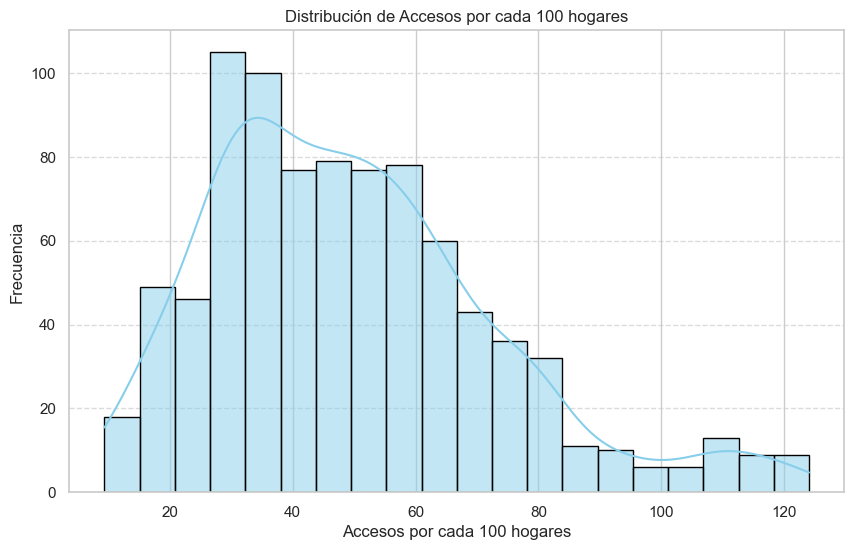

In [254]:
# Graficamos la distribución de la variable 'Accesos por cada 100 hogares'.
# Configuración de estilo de seaborn
sns.set(style="whitegrid")
# Graficamos la distribución de la variable 'Accesos por cada 100 hogares'
plt.figure(figsize=(10, 6))
sns.histplot(penetracion_inter['Accesos por cada 100 hogares'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Accesos por cada 100 hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Según el gráfico: la frecuencia de accesos por cada 100 hogares disminuye al aumentar el número de accesos por hogar, sugiriendo que la mayoría de las provincias tienen menos de 50 accesos por cada 100 hogares. Esto refleja diversidad y desigualdad en el uso de redes de comunicación. Se observa un menor número de hogares con alto consumo de accesos, indicando una menor desigualdad en este caso específico. En resumen, la visualización destaca patrones significativos que apuntan a la desigualdad en el uso de las redes, subrayando la necesidad de políticas para mejorar el acceso de manera equitativa a estas infraestructuras.*

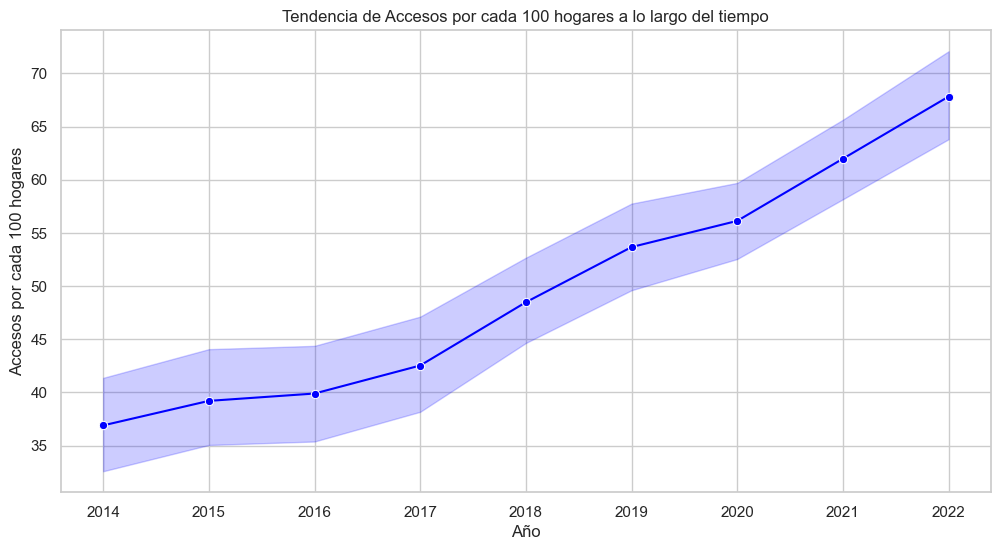

In [255]:
# Graficamos la distribución de la variable 'Accesos por cada 100 hogares' por año.
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=penetracion_inter, marker='o', color='blue')
plt.title('Tendencia de Accesos por cada 100 hogares a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

*A lo largo del periodo analizado, de 2014 a 2022, la tendencia de accesos por cada 100 hogares experimentó un aumento generalizado. El periodo inicial de 2014 a 2015 mostró un lento crecimiento. A pesar de una breve interrupción en 2016, la tendencia continuó siendo positiva en 2017, indicando un impulso adicional en el desarrollo de la infraestructura de telecomunicaciones. Entre 2018 y 2021, la tendencia se mantuvo positiva, con variaciones. Aunque los datos de 2022 no están completos, hasta ahora indican un crecimiento constante, reflejando posiblemente la expansión continua de la infraestructura de telecomunicaciones y el acceso a servicios en línea en estas áreas.*

### Dataset 2: Total nacional de accesos a Internet fijo por banda ancha y banda angosta.
- **Número total de accesos al servicio de Internet fijo por banda ancha y banda angosta (trimestral).**

In [256]:
internet_baf = pd.read_csv('DATA/Dataset_2_Internet_BAF.csv') # Cargamos el dataset.
internet_baf.head() # Mostramos el dataset.

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [257]:
# Ordenamos el dataframe internet_baf_total por año y trimestre
internet_baf = internet_baf.sort_values(by=['Año', 'Trimestre'])[['Periodo', 'Banda ancha fija', 'Dial up', 'Total']]

# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_baf.to_csv('DASHBOARD/DATA/Dataset_2_Internet_BAF.csv', index=False)

internet_baf.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 35 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Periodo           36 non-null     object
 1   Banda ancha fija  36 non-null     int64 
 2   Dial up           36 non-null     int64 
 3   Total             36 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [258]:
internet_baf.describe() # Mostramos la descripcion del dataset.

,Banda ancha fija,Dial up,Total
count,36.000000,36.000000,36.000000
mean,8.361111,23.083333,8.361111
std,1.495761,10.171037,1.495761
min,6.000000,10.000000,6.000000
25%,7.000000,12.000000,7.000000
50%,8.000000,27.000000,8.000000
75%,9.250000,32.250000,9.250000
max,11.000000,39.000000,11.000000


*El análisis de los datos revela que, en promedio, hay aproximadamente 8.36 accesos por cada 100 hogares para la banda ancha fija, mientras que el servicio Dial-Up presenta una media significativamente mayor, alcanzando 23.08 accesos por cada 100 hogares. Estas cifras indican una preferencia generalizada por la banda ancha fija en comparación con Dial-Up, respaldada por una variabilidad más baja en su adopción. El total de accesos sigue la misma tendencia que la banda ancha fija, con un promedio de 8.36 accesos por cada 100 hogares. Estas observaciones destacan la creciente popularidad de tecnologías de acceso más avanzadas y una disminución en la adopción de servicios más antiguos como Dial-Up.*

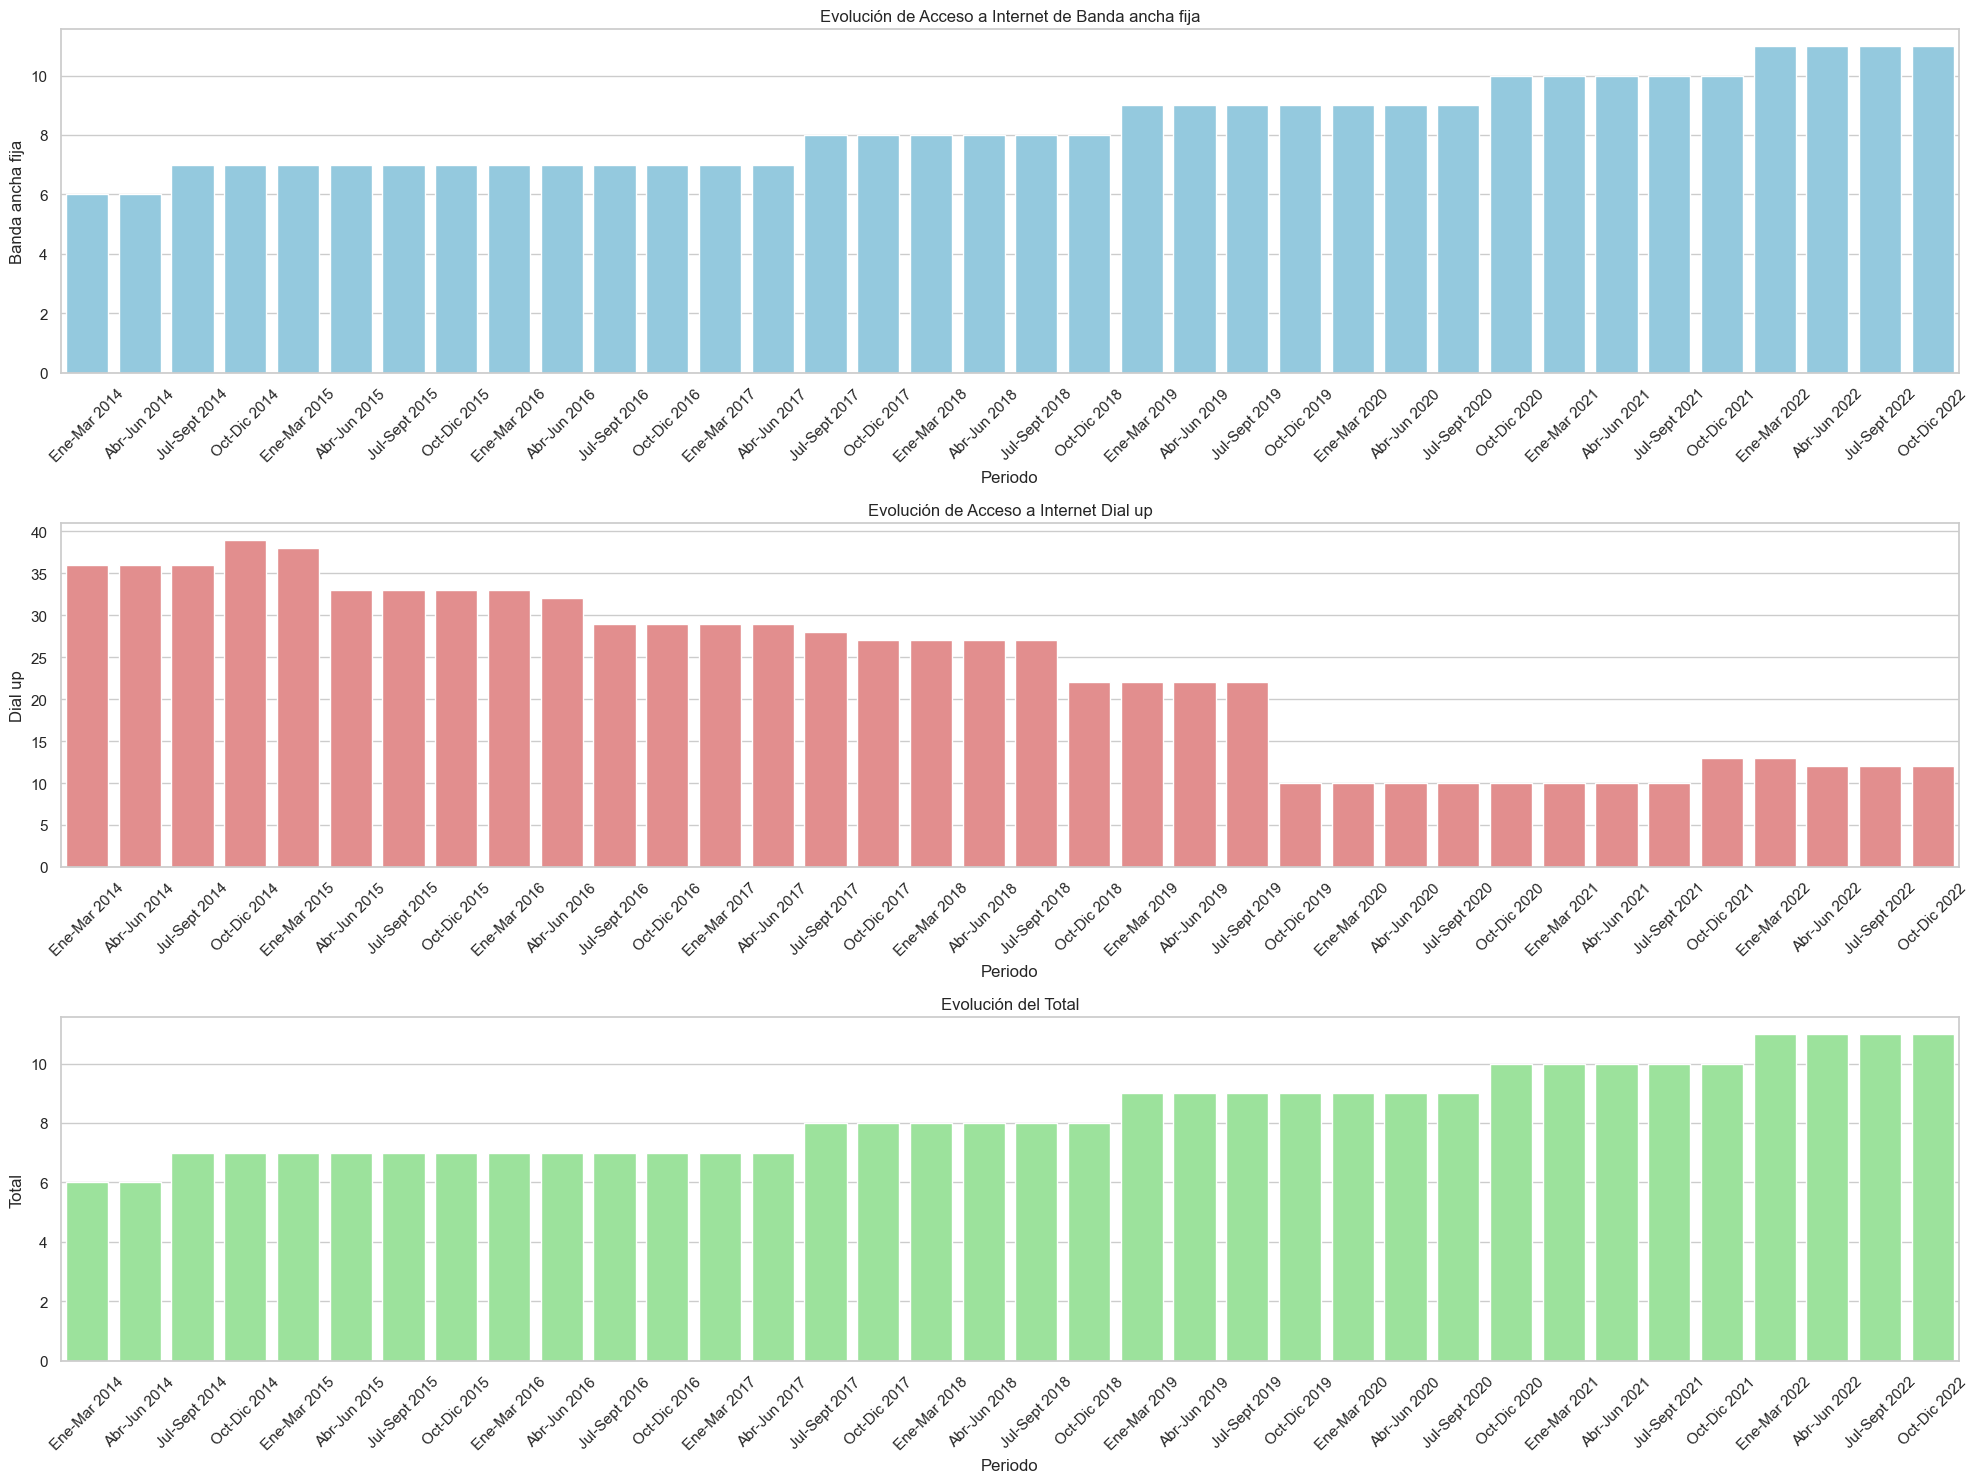

In [259]:
# Graficamos la distribución de la variable 'Banda ancha fija' y 'Dial up' por año.
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))

# Colores llamativos
colores = ['skyblue', 'lightcoral', 'lightgreen']

# barplot para 'Banda ancha fija'
sns.barplot(x='Periodo', y='Banda ancha fija', data=internet_baf, ax=axes[0], color=colores[0])
# Rotar las etiquetas
axes[0].tick_params(axis='x', rotation=45)  # Ajuste aquí
axes[0].set_title('Evolución de Acceso a Internet de Banda ancha fija')

# barplot para 'Dial up'
sns.barplot(x='Periodo', y='Dial up', data=internet_baf, ax=axes[1], color=colores[1])
# Rotar las etiquetas
axes[1].tick_params(axis='x', rotation=45)  # Ajuste aquí
axes[1].set_title('Evolución de Acceso a Internet Dial up')

# barplot para 'Total'
sns.barplot(x='Periodo', y='Total', data=internet_baf, ax=axes[2], color=colores[2])
# Rotar las etiquetas
axes[2].tick_params(axis='x', rotation=45)  # Ajuste aquí
axes[2].set_title('Evolución del Total')

# Ajusta el diseño de los subgráficos
plt.tight_layout()
# Muestra la imagen
plt.show()

*Se evidencia una tendencia ascendente en la cantidad de accesos por banda ancha fija desde 2014, sugiriendo su creciente popularidad como opción de acceso a Internet. En contraste, los accesos por Dial up han experimentado una marcada disminución desde el cuarto trimestre de 2014, con un estancamiento notorio entre 2019 y 2020, seguido por un leve repunte. Este patrón indica que el Dial up está perdiendo relevancia frente a opciones más modernas. A nivel nacional, se observa una tendencia general al alza en el total de accesos a Internet, con períodos intermitentes de estancamiento.*

### Dataset 3: Velocidad Media de bajada de Internet fijo.
- **Serie histórica de la velocidad media de descarga de Internet nacional (trimestral).**

In [260]:
velocidad_internet = pd.read_csv('DATA/Dataset_3_Historico_velocidad_internet.csv') # Cargamos el dataset.
velocidad_internet.head() # Mostramos el dataset.

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,4,10.656,Oct-Dic 2022
1,2022,3,6.246,Jul-Sept 2022
2,2022,2,5.844,Abr-Jun 2022
3,2022,1,5.511,Ene-Mar 2022
4,2021,4,5.234,Oct-Dic 2021


In [261]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
velocidad_internet.to_csv('DASHBOARD/DATA/Dataset_3_Historico_velocidad_internet.csv', index=False)

velocidad_internet.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     36 non-null     int64  
 1   Trimestre               36 non-null     int64  
 2   Mbps (Media de bajada)  36 non-null     float64
 3   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [262]:
velocidad_internet.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Mbps (Media de bajada)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,221.615333
std,2.618615,1.133893,275.439068
min,2014.000000,1.000000,1.201000
25%,2016.000000,1.750000,3.520500
50%,2018.000000,2.500000,5.677500
75%,2020.000000,3.250000,461.000000
max,2022.000000,4.000000,834.000000


*El análisis de las velocidades medias de bajada sugiere una mejora constante en el tiempo, alcanzando un máximo de 834 Mbps en 2022. Sin embargo, la disparidad entre la media (221.61 Mbps) y la mediana (5.68 Mbps) indica la presencia de conexiones más lentas que afectan el promedio general.*

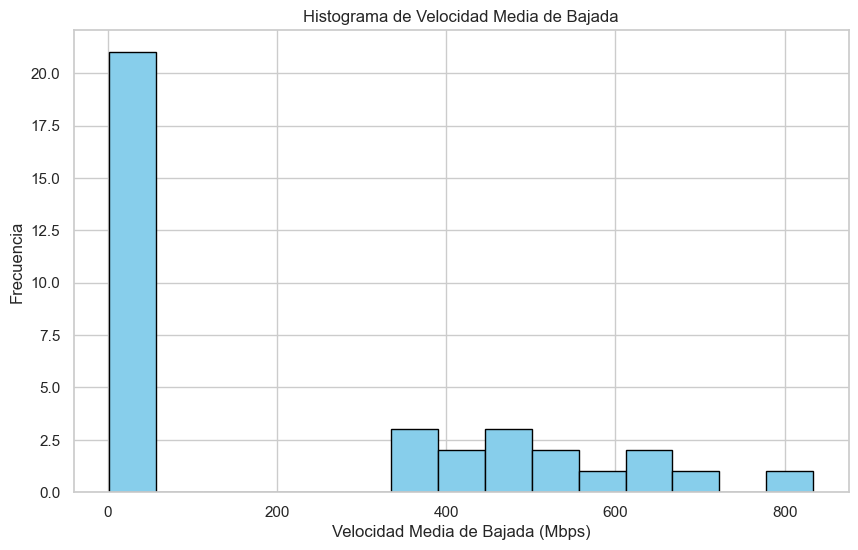

In [263]:
# Datos
mbps_data = velocidad_internet['Mbps (Media de bajada)']

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist(mbps_data, bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de Velocidad Media de Bajada')
plt.xlabel('Velocidad Media de Bajada (Mbps)')
plt.ylabel('Frecuencia')
plt.show()

*Los resultados del análisis de la Velocidad Media de Bajada indican que la distribución de velocidades varía desde 0 Mbps hasta 200 Mbps, sugiriendo una distribución normal centrada en velocidades típicas. La mayoría de los usuarios se encuentran en el rango de 0 a 200 Mbps, lo que indica velocidades aceptables para la navegación. Sin embargo, se observa que hay un número significativo de usuarios con velocidades más lentas que rápidas, y a medida que las velocidades aumentan, la frecuencia disminuye, señalando la menor prevalencia de velocidades rápidas. Además, un pequeño porcentaje de usuarios disfruta de velocidades superiores a 500 Mbps. En general, la experiencia de navegación es aceptable para la mayoría, pero existe una diversidad considerable en las velocidades de conexión.*

------

# *ANÁLISIS GEOGRÁFICO*

### Dataset 4: Accesos a banda ancha y banda angosta por provincia.
- **Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral).**

In [264]:
internet_baf_province = pd.read_csv('DATA/Dataset_4_Internet_BAF_Provincia.csv') # Cargamos el dataset.
internet_baf_province # Mostramos el dataset.

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


In [265]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_baf_province.to_csv('DASHBOARD/DATA/Dataset_4_Internet_BAF_Provincia.csv', index=False)

internet_baf_province.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [266]:
internet_baf_province.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,864.000000,864.000000,864.000000,862.000000,864.000000
mean,2018.000000,2.500000,137.326389,150.595128,137.636574
std,2.583484,1.118682,180.812265,230.167337,180.798813
min,2014.000000,1.000000,1.000000,0.000000,1.000000
25%,2016.000000,1.750000,39.000000,2.000000,39.750000
50%,2018.000000,2.500000,90.500000,16.000000,91.000000
75%,2020.000000,3.250000,143.000000,253.500000,143.250000
max,2022.000000,4.000000,987.000000,998.000000,987.000000


*Los datos muestran que, en promedio, la cantidad de conexiones de banda ancha fija y Dial-Up ha sido relativamente constante a lo largo de los años, con un promedio de 137 conexiones de banda ancha fija y 150 conexiones Dial-Up por trimestre. Sin embargo, se observa una variabilidad significativa, especialmente en la cantidad total de conexiones, que oscila entre 1 y 987. La presencia de conexiones mínimas en algunos trimestres indica posiblemente situaciones de baja demanda o áreas con acceso limitado. La mediana revela que la mitad de los trimestres tienen menos de 91 conexiones totales, sugiriendo una distribución sesgada hacia valores más bajos. Además, la presencia de valores extremadamente altos en el tercer y cuarto cuartil indica la existencia de algunos trimestres con una demanda notablemente alta. En resumen, mientras que el promedio sugiere cierta estabilidad, la variabilidad y los valores extremos señalan la presencia de condiciones fluctuantes en la demanda de conexiones a lo largo del tiempo.*

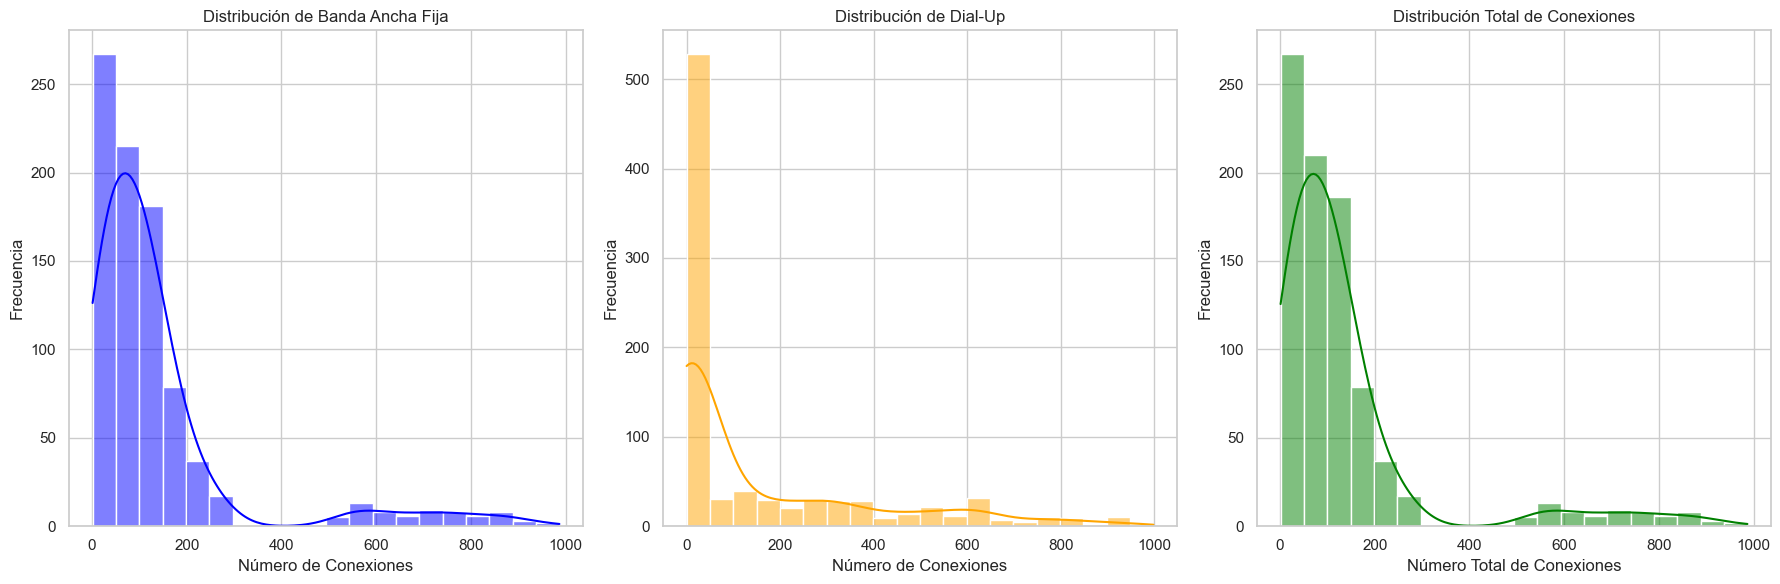

In [267]:
# Graficamos la distribución de la variable 'Banda ancha fija', 'Dial up' y 'Total' por provincia.
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histograma para la distribución de Banda Ancha Fija
sns.histplot(internet_baf_province['Banda ancha fija'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribución de Banda Ancha Fija')
axes[0].set_xlabel('Número de Conexiones')
axes[0].set_ylabel('Frecuencia')

# Histograma para la distribución de Dial-Up
sns.histplot(internet_baf_province['Dial up'].dropna(), bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribución de Dial-Up')
axes[1].set_xlabel('Número de Conexiones')
axes[1].set_ylabel('Frecuencia')

# Histograma para la distribución total
sns.histplot(internet_baf_province['Total'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribución Total de Conexiones')
axes[2].set_xlabel('Número Total de Conexiones')
axes[2].set_ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


*El análisis de las columnas 'Banda ancha fija', 'Dial up' y 'Total' revela patrones similares en las conexiones de Internet en las provincias. En general, la mayoría de las provincias tienen un número bajo de conexiones de banda ancha fija y dial-up, con medias de 137.33 y 150.25 conexiones, respectivamente. Sin embargo, se observan algunas provincias con valores notablemente altos en ambas categorías, indicando disparidades significativas en la distribución de conexiones. La columna 'Total', que representa la suma de las conexiones de banda ancha fija y dial-up, también sigue un patrón similar, con la mayoría de las provincias teniendo un número relativamente bajo de conexiones en general. Estos hallazgos sugieren una variabilidad sustancial en la adopción de diferentes tipos de conexiones en las provincias, con algunas áreas mostrando una demanda significativamente mayor que otras.*

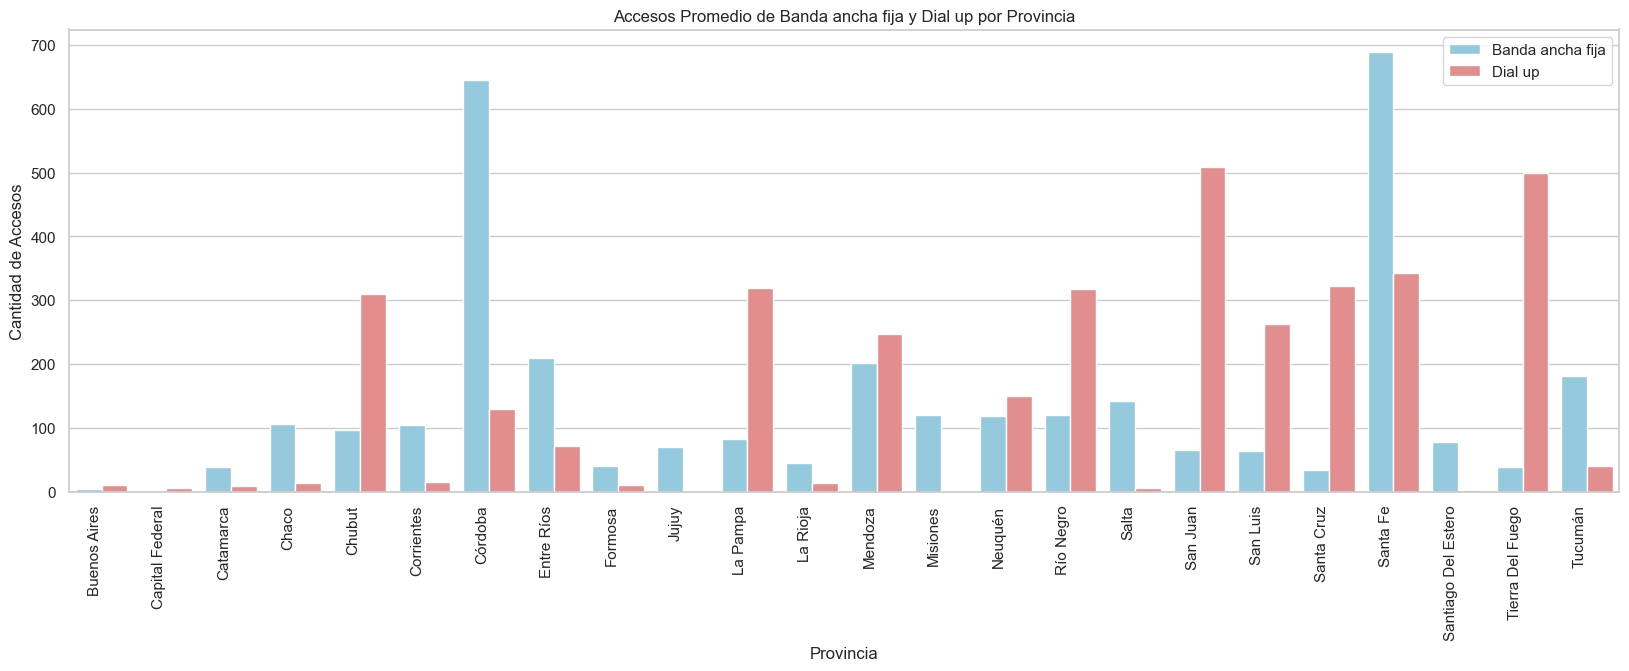

In [268]:
# Calculamos los promedios de 'Banda ancha fija' y 'Dial up'
promedios = internet_baf_province[['Provincia', 'Banda ancha fija', 'Dial up']].groupby(by='Provincia').mean().reset_index()

# Configuración de colores
colores = ['skyblue', 'lightcoral']

# Configuración de estilo de gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))

# Convertimos el DataFrame a un formato largo
promedios_long = promedios.melt('Provincia', var_name='Tipo de conexión', value_name='Frecuencia')

# Creamos los histogramas con colores vivos
plot = sns.barplot(x='Provincia', y='Frecuencia', hue='Tipo de conexión', data=promedios_long, palette=colores)

# Establecemos manualmente los ticks del eje x antes de rotar las etiquetas
ticks = range(len(promedios_long['Provincia'].unique()))
plt.xticks(ticks, promedios_long['Provincia'].unique(), rotation=90, ha='right')

plt.xlabel("Provincia")
plt.ylabel("Cantidad de Accesos")
plt.title("Accesos Promedio de Banda ancha fija y Dial up por Provincia")
plt.legend()

plt.show()

*La distribución de accesos a internet por provincia en Argentina es desigual, lo que implica diferencias en el acceso y la utilización de estas tecnologías en distintas regiones del país. Algunas provincias tienen un mayor porcentaje de accesos de banda ancha fija, lo que puede indicar un mayor desarrollo y adopción de la tecnología en estas áreas. Por otro lado, las provincias con mayor porcentaje de accesos por dial up, podrían indicar un desarrollo menos sostenido o limitado en estas regiones. En conclusión, la distribución de accesos a internet en Argentina es desigual, con provincias con mayor desarrollo y adopción de la tecnología de banda ancha fija tendiendo a tener mayores porcentajes de accesos en esta modalidad. Por otro lado, provincias con menor desarrollo o limitada inversión en infraestructura de telecomunicaciones podrían tener un mayor porcentaje de accesos por dial up, lo que podría afectar la calidad y sostenibilidad del acceso a internet en estas áreas.*

### Dataset 5: Acceso a Internet fijo por tecnología y provincia.
- **Número de accesos al servicio de Internet fijo por tipo de tecnología en cada provincia (trimestral).**

In [269]:
internet_tecnologia = pd.read_csv('DATA/Dataset_5_Internet_Accesos_tecnologia.csv') # Cargamos el dataset.
internet_tecnologia # Mostramos el dataset.

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...
860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0
863,2014,1,Tucumán,130.0,83.0,121.0,13.0,98.0,130.0


In [270]:
internet_tecnologia.info() # Mostramos la informacion del dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865 entries, 0 to 864
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           865 non-null    object 
 1   Trimestre     865 non-null    object 
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), object(3)
memory usage: 60.9+ KB


In [271]:
# Paso 1: Eliminar la última fila
internet_tecnologia = internet_tecnologia.iloc[:-1]  # Elimina la última fila

# Paso 2: Tratar valores nulos (si es necesario)
# Por ejemplo, llenar los valores nulos con ceros
internet_tecnologia = internet_tecnologia.fillna(0)

# Paso 3: Convertir ciertas columnas a tipo de dato entero
columnas_a_convertir = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
internet_tecnologia[columnas_a_convertir] = internet_tecnologia[columnas_a_convertir].astype(int)

# Verificar el resultado
print(internet_tecnologia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    object
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int32 
 4   Cablemodem    864 non-null    int32 
 5   Fibra óptica  864 non-null    int32 
 6   Wireless      864 non-null    int32 
 7   Otros         864 non-null    int32 
 8   Total         864 non-null    int32 
dtypes: int32(6), object(3)
memory usage: 40.6+ KB
None


In [272]:
internet_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,5
1,2022,4,Capital Federal,139,1,139,5,32,2
2,2022,4,Catamarca,9,11,47,1,2,71
3,2022,4,Chaco,25,61,47,8,3,144
4,2022,4,Chubut,45,74,10,31,9,169
...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,19,100,381,4,3,27
860,2014,1,Santa Fe,323,174,3,6,644,507
861,2014,1,Santiago Del Estero,33,4,19,915,34,37
862,2014,1,Tierra Del Fuego,22,3,648,1,3,28


In [273]:
internet_tecnologia['Año'] = internet_tecnologia['Año'].str.replace(' *','').astype(int)
internet_tecnologia['Trimestre'] = internet_tecnologia['Trimestre'].str.replace(' *','').astype(int)

In [274]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_tecnologia.to_csv('DASHBOARD/DATA/Dataset_5_Internet_Accesos_tecnologia.csv', index=False)

internet_tecnologia.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


*La información muestra que, en promedio, las conexiones de banda ancha fija han experimentado un crecimiento constante desde 2014 hasta 2022. La tecnología de fibra óptica es la más utilizada, con una media de 165.43 conexiones por trimestre, seguida por el cablemódem con 103.29 conexiones y ADSL con 86.36 conexiones. Por otro lado, las conexiones inalámbricas y otros tipos de conexiones tienen una presencia más moderada. Es evidente que la fibra óptica ha ganado popularidad a lo largo del tiempo, superando a las tecnologías más antiguas como ADSL y cablemódem. Además, la amplia brecha entre el máximo y el mínimo en cada categoría sugiere una variabilidad significativa entre las provincias en cuanto a la adopción de estas tecnologías de conexión a Internet.*

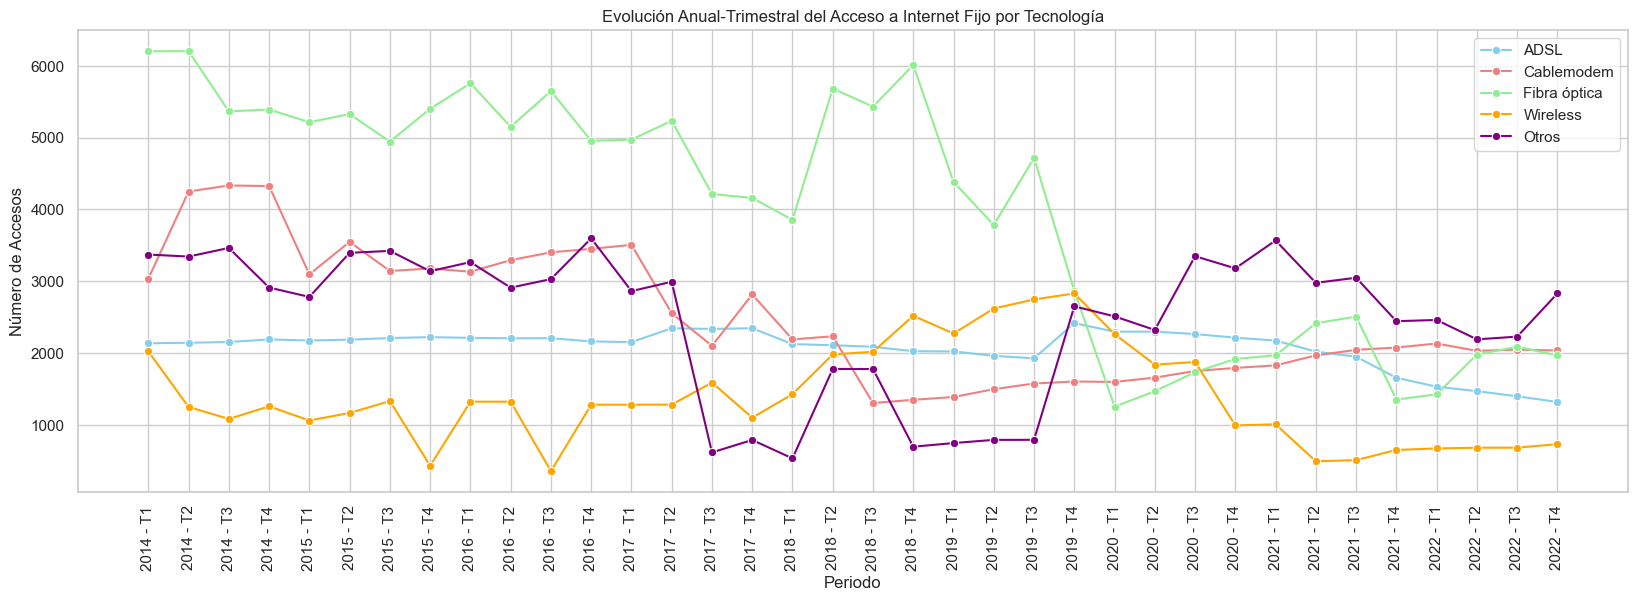

In [275]:
# Tomamos las columnas necesarias para el gráfico
df = internet_tecnologia[['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].groupby(by=['Año', 'Trimestre']).sum().reset_index()
# Creamos una columna 'Periodo' concatenando las columnas 'Año' y 'Trimestre'
df['Periodo'] = df['Año'].astype(str) + ' - T' + df['Trimestre'].astype(str)

plt.figure(figsize=(20, 6))

# Colores llamativos para cada tipo de tecnología
colores = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'purple']

# Graficamos la evolución del Acceso al Internet fijo para cada tipo de Tecnología
for i, columna in enumerate(['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']):
    sns.lineplot(x=df['Periodo'], y=df[columna], label=columna, marker='o', color=colores[i])

plt.title('Evolución Anual-Trimestral del Acceso a Internet Fijo por Tecnología')
plt.xlabel('Periodo')
plt.ylabel('Número de Accesos')
plt.xticks(rotation=90)
plt.legend()

plt.show()

*Durante el período analizado, se observa una serie de tendencias en las preferencias de tecnología de acceso a Internet. El acceso por ADSL se mantuvo estable hasta el tercer trimestre de 2020, momento en el cual comenzó a disminuir, sugiriendo un cambio de preferencia hacia otras tecnologías. El acceso por cablemódem experimentó una disminución hasta el tercer trimestre de 2018, seguido de un crecimiento leve hasta mediados de 2022. La fibra óptica fue la tecnología más utilizada hasta fines de 2019, pero posteriormente experimentó una fuerte caída hasta el primer trimestre de 2020. Por otro lado, el acceso inalámbrico (Wireless) mostró un crecimiento significativo a partir de 2018, aunque con una participación total aún relativamente baja. La categoría "Otros" exhibió fluctuaciones notables, especialmente entre 2017 y 2019, con aumentos notables en el cuarto trimestre de 2019 y durante 2020. Estas observaciones señalan cambios en las preferencias de los usuarios hacia tecnologías más modernas y rápidas, como la fibra óptica y Wireless, mientras que tecnologías más antiguas como ADSL y cablemódem muestran disminuciones o estabilización en su uso.*

### Dataset 6: Velocidad media de bajada de Internet fijo por provincia.
- **Serie histórica de la velocidad media de descarga de Internet por provincia (trimestral).**

In [276]:
velocidad_internet_province = pd.read_csv('DATA/Dataset_6_Historico_velocidad_internet_provincia.csv') # Cargamos el dataset.
velocidad_internet_province # Mostramos el dataset.

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
...,...,...,...,...
859,2014,1,Santa Cruz,332.000
860,2014,1,Santa Fe,315.000
861,2014,1,Santiago Del Estero,295.000
862,2014,1,Tierra Del Fuego,345.000


In [277]:
velocidad_internet_province.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [278]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
velocidad_internet_province.to_csv('DASHBOARD/DATA/Dataset_6_Historico_velocidad_internet_provincia.csv', index=False)

velocidad_internet_province.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


*La información sobre la velocidad media de bajada en Mbps muestra que, en promedio, ha habido un aumento a lo largo del tiempo, desde aproximadamente 302 Mbps en 2018 hasta un máximo de 988 Mbps en 2022. Sin embargo, la presencia de un valor mínimo de 1 Mbps indica la existencia de conexiones extremadamente lentas. Además, la considerable desviación estándar de 287.31 sugiere una variabilidad significativa en las velocidades de bajada, lo que podría deberse a diferencias notables entre las regiones o a la presencia de conexiones de muy alta velocidad en algunos casos. En general, la tendencia hacia velocidades más altas indica un progreso en la infraestructura de Internet, aunque la variabilidad subyacente destaca la diversidad de experiencias de conexión en la población.*

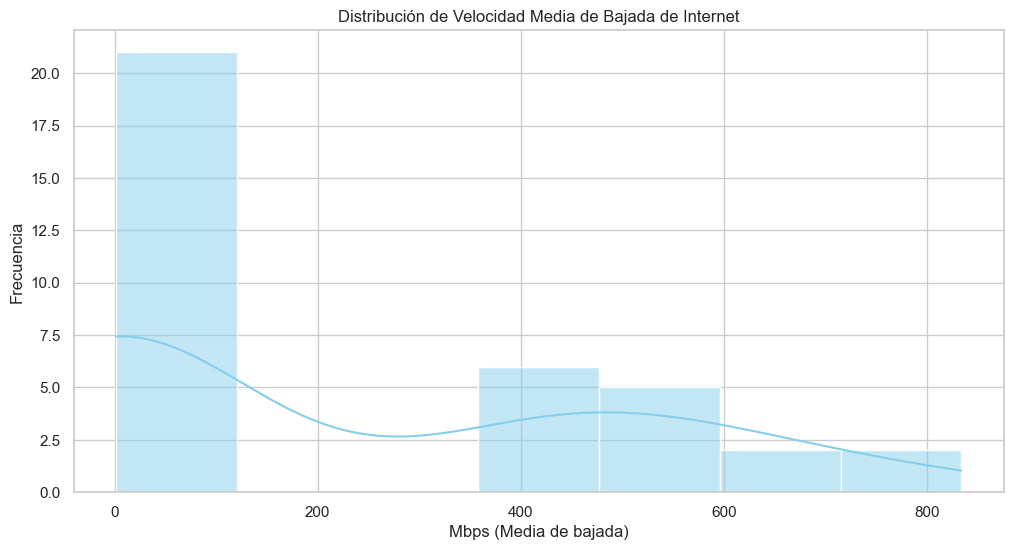

In [279]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear una figura y ejes (subplots)
plt.figure(figsize=(12, 6))

# Histograma de la velocidad media de bajada en Mbps
sns.histplot(velocidad_internet['Mbps (Media de bajada)'], kde=True, color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Velocidad Media de Bajada de Internet')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')

# Mostrar la imagen
plt.show()

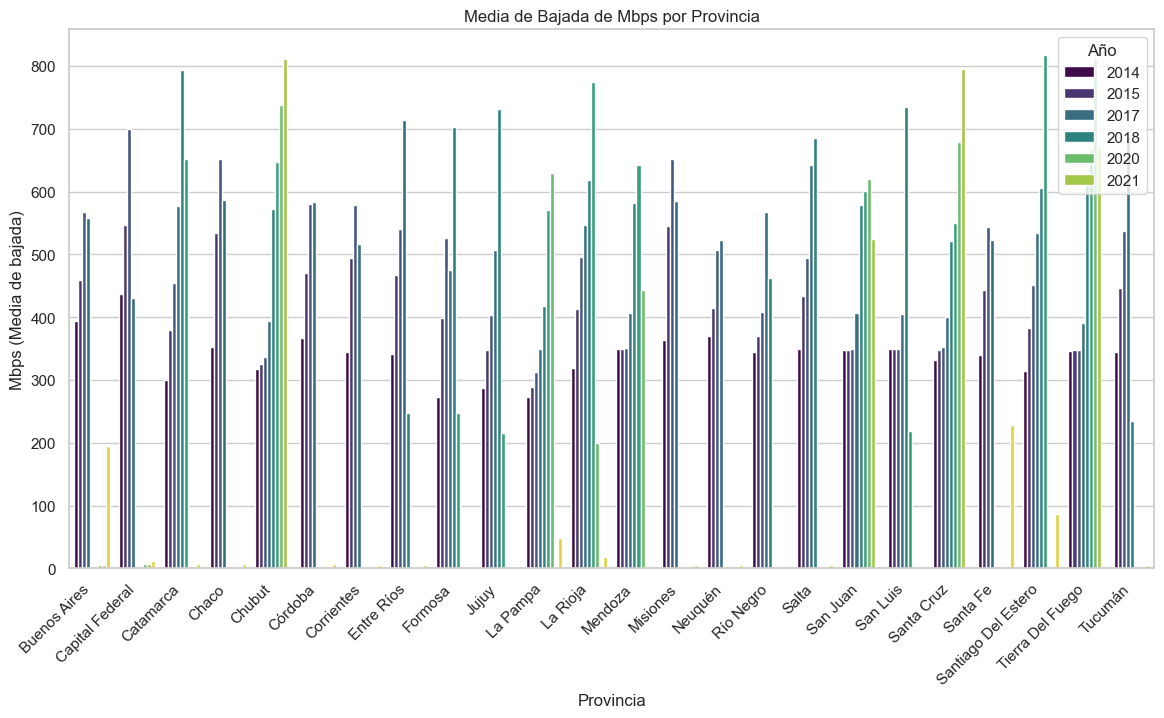

In [280]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de barras para la media de bajada por provincia
plt.figure(figsize=(14, 7))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=velocidad_internet_province, hue='Año', errorbar=None, palette='viridis')
plt.title('Media de Bajada de Mbps por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(title='Año', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

----

# *CALIDAD DE SERVICIO*

### Dataset 7: Distribución de los accesos totales nacionales a Internet fijo por velocidad.
- **Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible).**

In [281]:
distribucion_velocidad = pd.read_csv('DATA/Dataset_7_Internet_Accesos_velocidad.csv') # Cargamos el dataset.
distribucion_velocidad.head() # Mostramos el dataset.

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [282]:
distribucion_velocidad.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      36 non-null     int64  
 1   Trimestre                36 non-null     int64  
 2   Hasta 512 kbps           36 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  36 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    36 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   36 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  36 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  36 non-null     object 
 8   Más de 30 Mbps           36 non-null     object 
 9   OTROS                    36 non-null     float64
 10  Total                    36 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ KB


In [283]:
distribucion_velocidad.head() # Mostramos el dataset.

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1.075.272,1.109.421,765.015,335.573,7.410.902,394.282,11.208.114
1,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
2,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
3,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
4,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794


In [284]:
# Lista de columnas con formato de texto
columnas_texto = ['Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps',
                'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Total']

# Iterar sobre las columnas y aplicar la transformación
for columna in columnas_texto:
    distribucion_velocidad[columna] = distribucion_velocidad[columna].str.replace('.', '').astype(float)

# Verificar el resultado
print(distribucion_velocidad.dtypes)


Año                          int64
Trimestre                    int64
Hasta 512 kbps             float64
Entre 512 Kbps y 1 Mbps    float64
Entre 1 Mbps y 6 Mbps      float64
Entre 6 Mbps y 10 Mbps     float64
Entre 10 Mbps y 20 Mbps    float64
Entre 20 Mbps y 30 Mbps    float64
Más de 30 Mbps             float64
OTROS                      float64
Total                      float64
dtype: object


In [285]:
distribucion_velocidad.head() # Mostramos el dataset.

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,31.981,85.668,1075272.0,1109421.0,765015.0,335573.0,7410902.0,394.282,11208114.0
1,2022,3,33.013,96.727,1161370.0,1151906.0,823505.0,479822.0,6995750.0,349.035,11091128.0
2,2022,2,33.667,99.498,1193090.0,1197030.0,856562.0,485321.0,6741922.0,351.594,10958684.0
3,2022,1,34.890,104.840,1263273.0,1209148.0,967508.0,509830.0,6336187.0,198.333,10624009.0
4,2021,4,41.262,28.521,1413208.0,1245333.0,976539.0,558358.0,6032322.0,194.251,10489794.0


In [286]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
distribucion_velocidad.to_csv('DASHBOARD/DATA/Dataset_7_Internet_Accesos_velocidad.csv', index=False)

distribucion_velocidad.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,3.600000e+01
mean,2018.000000,2.500000,49.571639,239.046083,3.552501e+06,9.034036e+05,9.147367e+05,4.990417e+05,2.053382e+06,126.059500,8.337742e+06
std,2.618615,1.133893,52.406959,198.205545,1.342734e+06,2.453029e+05,4.818186e+05,4.658192e+05,2.498904e+06,120.429286,1.504414e+06
min,2014.000000,1.000000,5.675000,28.521000,1.075272e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.750000,28.412500,74.491750,2.634148e+06,7.884982e+05,6.803692e+05,6.239875e+04,2.761000e+04,0.000000,7.085635e+06
50%,2018.000000,2.500000,38.879500,216.701500,3.415018e+06,9.781860e+05,8.111225e+05,4.975755e+05,4.845840e+05,155.810000,8.228740e+06
75%,2020.000000,3.250000,41.184000,389.368250,4.970678e+06,1.065288e+06,1.139898e+06,6.358098e+05,4.099905e+06,199.011250,9.410040e+06
max,2022.000000,4.000000,241.713000,687.619000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,7.410902e+06,394.282000,1.120811e+07


*El análisis estadístico de las velocidades de conexión a lo largo de los trimestres y años revela patrones significativos. En promedio, las velocidades "Entre 1 Mbps y 6 Mbps" destacan, seguidas por "Hasta 512 Kbps". Sin embargo, hay variabilidad significativa, especialmente en las categorías "Entre 1 Mbps y 6 Mbps" y "Entre 10 Mbps y 20 Mbps". Se observa un aumento progresivo en las velocidades, con "Más de 30 Mbps" alcanzando el valor máximo. La columna "Total" refleja la suma acumulada de velocidades para cada trimestre. Estos resultados sugieren una mejora general en las velocidades de conexión a lo largo del tiempo, con notables diferencias entre las categorías, proporcionando información valiosa para comprender la evolución de la infraestructura de red.*

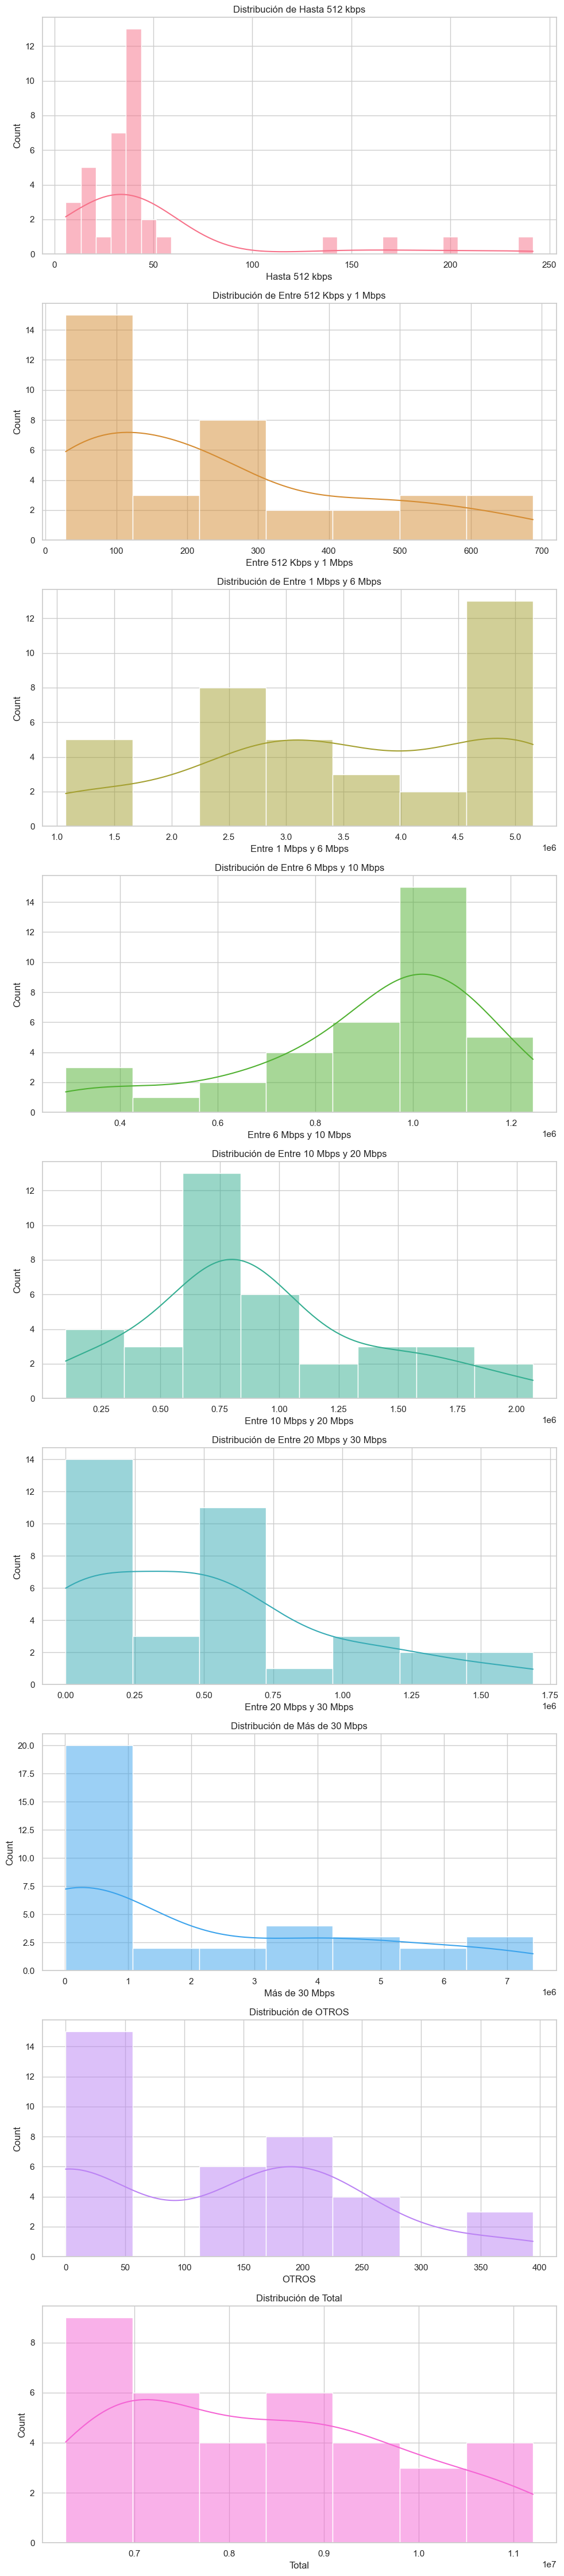

In [287]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Obtener las columnas numéricas del DataFrame
columnas_numericas = distribucion_velocidad.select_dtypes(include=['float64']).columns

# Configurar el diseño de subgráficos
num_rows = len(columnas_numericas)
fig, axes = plt.subplots(nrows=num_rows, figsize=(10, 5 * num_rows))

# Paleta de colores vivos
colores = sns.color_palette("husl", num_rows)

# Iterar sobre las columnas numéricas y crear gráficos de barras
for i, col in enumerate(columnas_numericas):
    # Gráfico de barras para la distribución de velocidades
    sns.histplot(data=distribucion_velocidad, x=col, kde=True, ax=axes[i], color=colores[i])
    axes[i].set_title(f'Distribución de {col}')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

*La distribución de accesos a Internet fijo por velocidades revela tendencias interesantes. En el caso de velocidades hasta 512 Kbps, se observa una disminución en los accesos a lo largo de los años. Las velocidades entre 512 Kbps y 1 Mbps muestran una distribución más estable, con una cantidad considerable de accesos alrededor de los 200 mil. Las velocidades de 1 Mbps a 6 Mbps exhiben un aumento gradual, superando los 3 millones. Las velocidades de 6 Mbps a 10 Mbps muestran un incremento significativo, superando el millón de accesos. Las velocidades de 10 Mbps a 20 Mbps presentan una distribución hacia la derecha, con años que superan los 2 millones de accesos. Las velocidades de 20 Mbps a 30 Mbps muestran una distribución similar, con una mayor concentración alrededor de los 500 mil. En general, se evidencia una evolución en la demanda de velocidades más altas, posiblemente influenciada por cambios en la infraestructura y preferencias de los usuarios.*

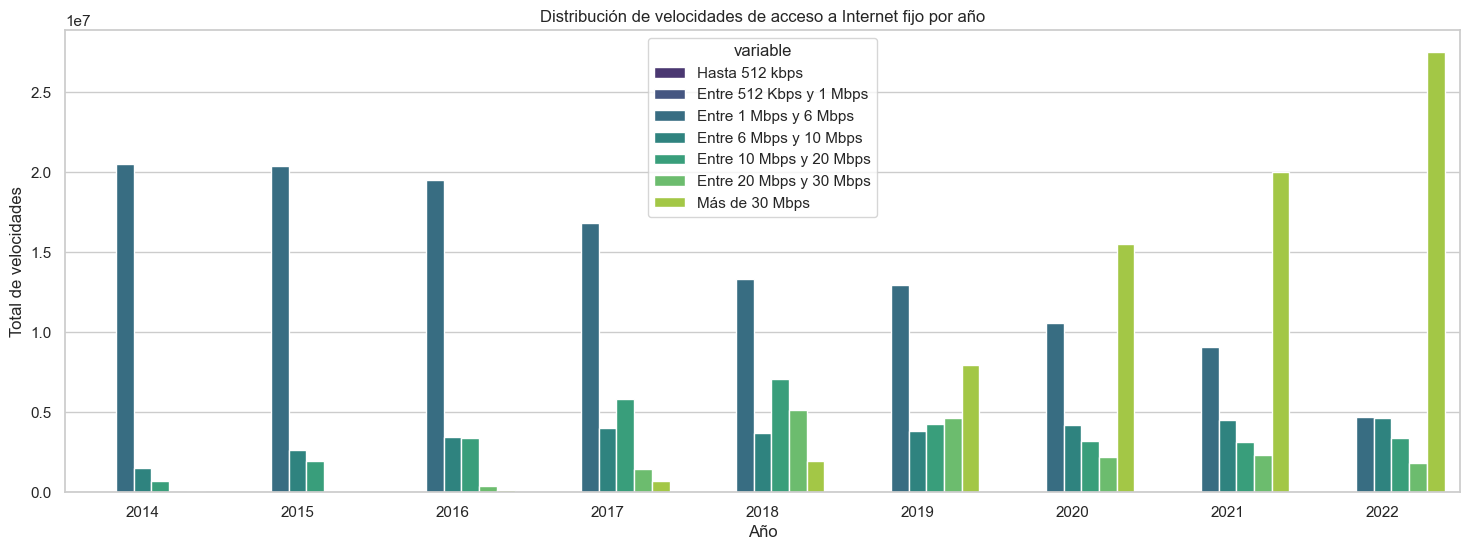

In [288]:
plt.figure(figsize=(18, 6))

columnas = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']

# Agrupamos por Año y sumamos las velocidades correspondientes
distribucion_velocidad_año = distribucion_velocidad.groupby('Año').sum().reset_index()

# Personalizar la paleta de colores
colores = sns.color_palette("viridis", len(columnas))

sns.barplot(data=pd.melt(distribucion_velocidad_año, id_vars=['Año'], value_vars=columnas), x='Año', y='value', hue='variable', palette=colores)
plt.title('Distribución de velocidades de acceso a Internet fijo por año')
plt.xlabel('Año')
plt.ylabel('Total de velocidades')
plt.show()

*A lo largo del tiempo, se ha registrado un aumento general en la cantidad de accesos totales, destacando la categoría de velocidad de acceso de más de 30 Mbps con más de 7 millones de accesos en 2022. En contraste, la categoría de velocidad de acceso entre 1 y 6 Mbps, que tenía más de 5 millones de accesos en 2014, experimentó una reducción antes de que la categoría de más de 30 Mbps repuntara en accesos. Las velocidades hasta 512 Kbps y 1 Mbps muestran una disminución significativa, sugiriendo que estas categorías están prácticamente en desuso en la actualidad.*

### Dataset 8: Acceso a Internet Fijo por rangos de velocidad de bajada y provincia.
- **Número de accesos al servicio de Internet fijo por velocidad de bajada en cada provincia (trimestral).**

In [289]:
internet_baf_rangos = pd.read_csv('DATA/Dataset_8_Internet_Accesos_velocidad_provincia.csv') # Cargamos el dataset.
internet_baf_rangos.head() # Mostramos el dataset.

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634.0,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772.0,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280.0,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909.0,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026.0,168759


In [290]:
internet_baf_rangos.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    int64  
 4   + 512 Kbps - 1 Mbps  864 non-null    int64  
 5   + 1 Mbps - 6 Mbps    864 non-null    int64  
 6   + 6 Mbps - 10 Mbps   864 non-null    int64  
 7   + 10 Mbps - 20 Mbps  864 non-null    int64  
 8   + 20 Mbps - 30 Mbps  864 non-null    int64  
 9   + 30 Mbps            864 non-null    int64  
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 81.1+ KB


In [291]:
internet_baf_rangos.rename(columns={'HASTA 512 kbps':'Hasta 512 kbps',
                                        '+ 512 Kbps - 1 Mbps':'Entre 512 Kbps y 1 Mbps',
                                        '+ 1 Mbps - 6 Mbps':'Entre 1 Mbps y 6 Mbps',
                                        '+ 6 Mbps - 10 Mbps':'Entre 6 Mbps y 10 Mbps',
                                        '+ 10 Mbps - 20 Mbps':'Entre 10 Mbps y 20 Mbps',
                                        '+ 20 Mbps - 30 Mbps':'Entre 20 Mbps y 30 Mbps',
                                        '+ 30 Mbps':'Más de 30 Mbps'}, inplace=True)

internet_baf_rangos.head()

,Año,Trimestre,Provincia,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634.0,4794665
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772.0,1551926
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280.0,70909
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909.0,143663
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026.0,168759


In [292]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_baf_rangos.to_csv('DASHBOARD/DATA/Dataset_8_Internet_Accesos_velocidad_provincia.csv', index=False)

internet_baf_rangos.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000,864.000000,8.640000e+02,858.00000,8.640000e+02
mean,2018.000000,2.500000,2065.484954,9960.253472,1.480209e+05,37641.817130,38114.030093,20793.402778,8.555756e+04,5289.20979,3.474059e+05
std,2.583484,1.118682,13459.419781,21992.818099,3.438435e+05,65383.131285,93024.185638,73859.534393,3.635417e+05,13011.53175,7.450600e+05
min,2014.000000,1.000000,6.000000,0.000000,2.531000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.00000,1.240600e+04
25%,2016.000000,1.750000,39.000000,312.000000,2.744150e+04,2929.000000,1579.750000,25.750000,8.000000e+00,0.00000,5.274050e+04
50%,2018.000000,2.500000,109.000000,2536.000000,4.783750e+04,11247.000000,9067.000000,1146.000000,1.019000e+03,0.00000,1.052355e+05
75%,2020.000000,3.250000,541.250000,8056.250000,8.639200e+04,38753.250000,26408.000000,9567.500000,2.247475e+04,5146.00000,1.791482e+05
max,2022.000000,4.000000,238920.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.760109e+06,120464.00000,4.794665e+06


*El análisis de la distribución de velocidades de acceso a Internet fijo en base a los datos proporcionados revela varias tendencias interesantes. En primer lugar, la cantidad total de accesos ha experimentado un aumento general a lo largo del tiempo, con una marcada variabilidad en las velocidades de acceso. Las velocidades de hasta 512 Kbps y de 512 Kbps a 1 Mbps han disminuido significativamente, indicando una transición hacia velocidades más altas. Por otro lado, las velocidades entre 1 Mbps y 6 Mbps han experimentado un aumento constante, superando los 100,000 accesos en algunos trimestres. Las velocidades más altas, en particular de 10 Mbps a 20 Mbps y de 20 Mbps a 30 Mbps, también han experimentado un crecimiento, lo que sugiere una demanda creciente de conexiones de mayor velocidad. La categoría de más de 30 Mbps muestra la mayor cantidad de accesos, indicando una preferencia creciente por velocidades más rápidas. Sin embargo, es crucial abordar valores negativos y anomalías en los datos, como los valores negativos en la columna "OTROS", para garantizar la integridad y confiabilidad del análisis.*

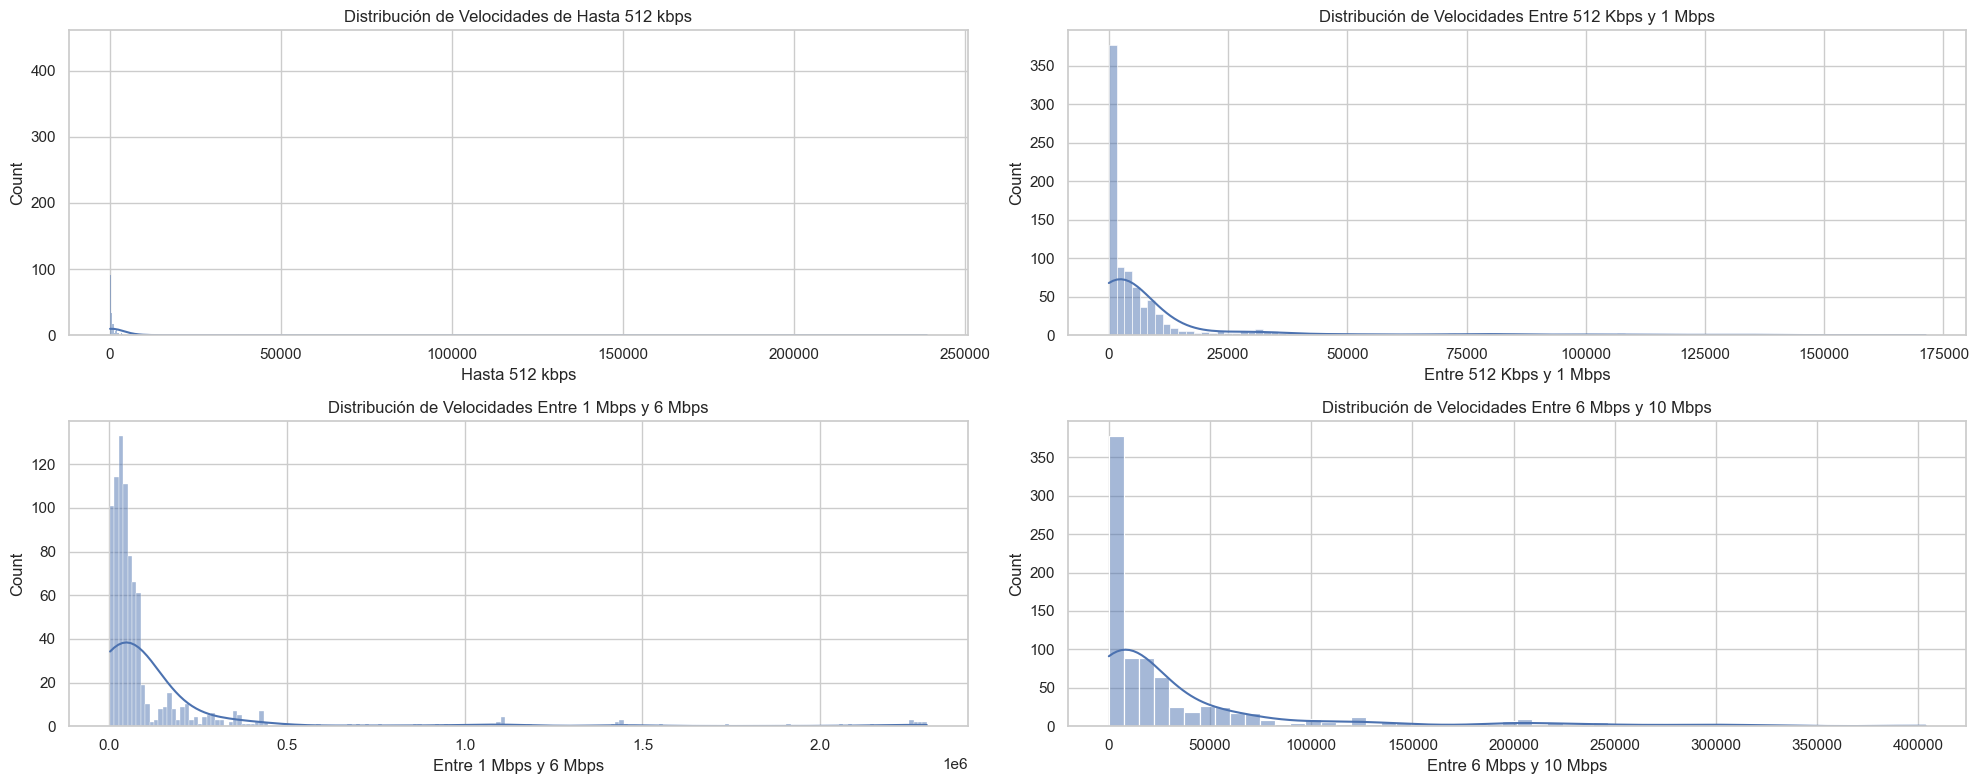

In [293]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 8))

# Gráfico de barras para velocidad de Hasta 512 kbps
plt.subplot(2, 2, 1)
sns.histplot(data=internet_baf_rangos, x='Hasta 512 kbps', kde=True)
plt.title('Distribución de Velocidades de Hasta 512 kbps')

# Gráfico de barras para velocidades Entre 512 Kbps y 1 Mbps
plt.subplot(2, 2, 2)
sns.histplot(data=internet_baf_rangos, x='Entre 512 Kbps y 1 Mbps', kde=True)
plt.title('Distribución de Velocidades Entre 512 Kbps y 1 Mbps')

# Gráfico de barras para velocidades Entre 1 Mbps y 6 Mbps
plt.subplot(2, 2, 3)
sns.histplot(data=internet_baf_rangos, x='Entre 1 Mbps y 6 Mbps', kde=True)
plt.title('Distribución de Velocidades Entre 1 Mbps y 6 Mbps')

# Gráfico de barras para velocidades Entre 6 Mbps y 10 Mbps
plt.subplot(2, 2, 4)
sns.histplot(data=internet_baf_rangos, x='Entre 6 Mbps y 10 Mbps', kde=True)
plt.title('Distribución de Velocidades Entre 6 Mbps y 10 Mbps')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

*Las distribuciones de velocidades de acceso a internet en todos los rangos muestran un sesgo hacia la derecha, indicando la presencia de valores atípicos o velocidades extremadamente altas. Este fenómeno podría atribuirse a la prevalencia de hogares con velocidades más bajas en comparación con un pequeño porcentaje de hogares con velocidades sustancialmente más altas. La presencia de valores atípicos podría ser consecuencia de la creciente demanda de velocidades más altas, posiblemente impulsada por el aumento de actividades en línea, como el trabajo remoto, el entretenimiento en línea y la educación en línea. Este patrón sugiere una tendencia hacia la adopción de velocidades de transferencia de datos más altas en respuesta a las cambiantes necesidades y demandas de conectividad.*

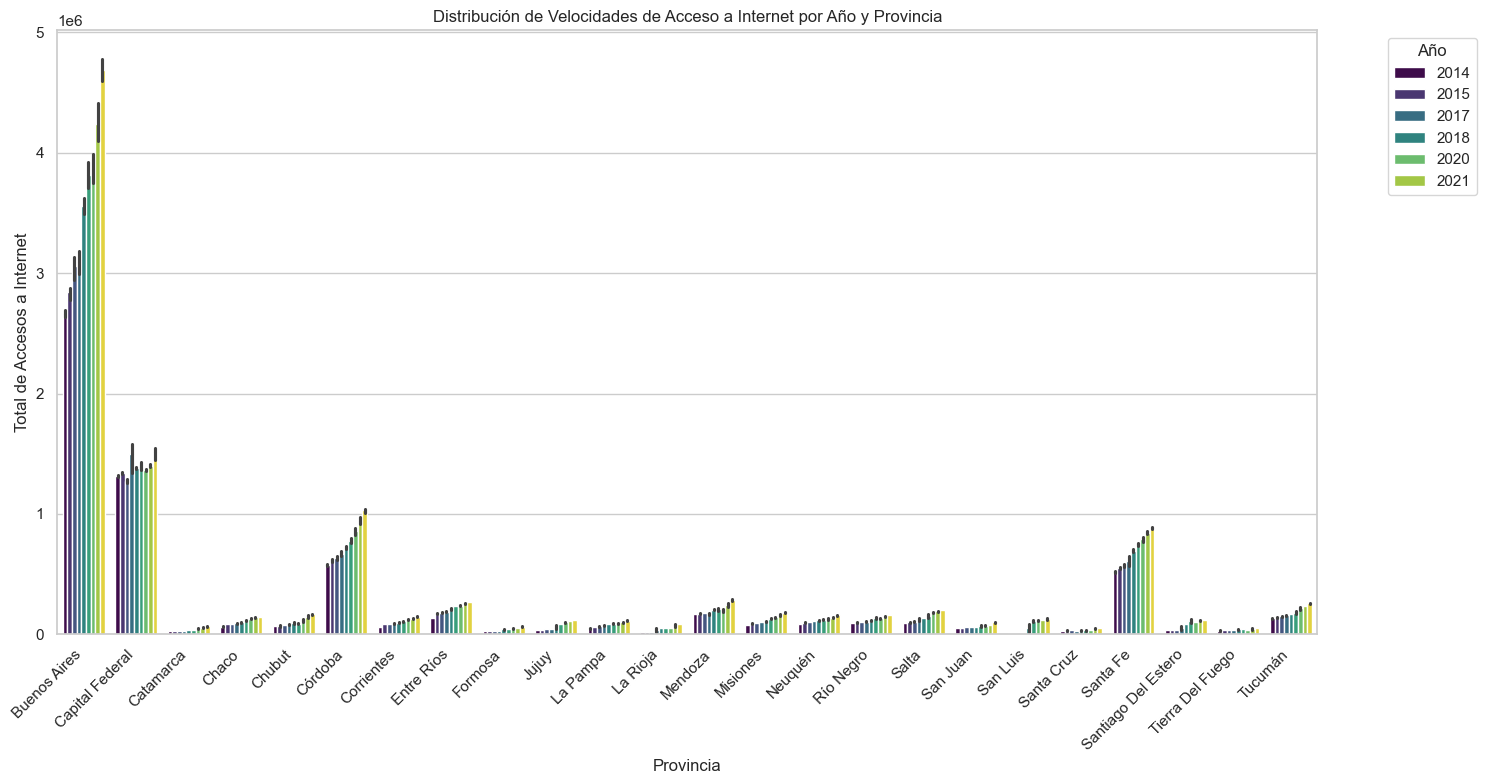

In [294]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 8))
sns.barplot(
    x="Provincia",
    y="Total",
    hue="Año",
    data=internet_baf_rangos,
    dodge=True,  # Separar las barras agrupadas por provincia y año
    palette="viridis",  # Puedes cambiar la paleta de colores si lo deseas
)

# Añadir etiquetas y título
plt.title('Distribución de Velocidades de Acceso a Internet por Año y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos a Internet')

# Mostrar leyenda
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()

*Este gráfico nos permite comparar visualmente cómo varía la distribución de accesos a Internet en diferentes provincias a lo largo de los años, identificando patrones o cambios en la cantidad total de accesos para cada provincia en cada año.*

---------

# *OPORTUNIDADES DE CRECIMIENTO*

### Dataset 9: Listado de localidades con conectividad a internet.
- **Listado de localidades con conectividad a internet, con detalle por tipo de conexión.**

In [295]:
internet_localidades = pd.read_csv('DATA/Dataset_9_Listado_localidades_internet.csv') # Cargamos el dataset.
internet_localidades.head() # Mostramos el dataset.

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,--,--,--,SI,SI,SI,--,--
1,BUENOS AIRES,9 de Julio,Carlos María Naón,--,--,--,--,SI,SI,SI,--,--
2,BUENOS AIRES,9 de Julio,Dudignac,--,--,SI,--,SI,SI,SI,SI,--
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),--,--,--,--,SI,--,--,--,--
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,--,--,SI,SI,SI,SI,--,--


In [296]:
internet_localidades.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


In [297]:
internet_localidades.replace({'SI': 1, '--': 0}, inplace=True)
internet_localidades

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,BUENOS AIRES,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0
2,BUENOS AIRES,9 de Julio,Dudignac,0,0,1,0,1,1,1,1,0
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),0,0,0,0,1,0,0,0,0
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),1,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,1,1,1,1,1,1,1,1,1
4307,BUENOS AIRES,Pilar,Presidente Derqui,1,1,0,1,1,1,1,1,0
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,0,0,0,0,1,1,0,0,0
4309,BUENOS AIRES,Pilar,Santa Teresa,0,0,0,0,1,1,0,0,1


In [298]:
internet_localidades = internet_localidades[['Provincia', 'ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']].groupby('Provincia').sum().reset_index()
internet_localidades

,Provincia,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,356,342,213,463,655,590,551,502,155
1,CABA,48,48,48,48,48,48,48,48,48
2,CATAMARCA,7,1,1,23,57,29,56,34,47
3,CHACO,28,12,1,45,75,44,47,46,42
4,CHUBUT,14,10,15,13,38,31,55,31,49
5,CORDOBA,179,88,5,175,344,277,318,291,73
6,CORRIENTES,21,9,1,12,70,39,51,46,52
7,ENTRE RIOS,47,39,4,48,128,78,130,126,20
8,FORMOSA,13,3,0,16,42,16,31,59,22
9,JUJUY,19,15,0,47,45,28,57,39,44


*El análisis de las conexiones de Internet por tecnología en diferentes provincias de Argentina revela tendencias interesantes. La fibra óptica y el cablemódem son las tecnologías predominantes en la mayoría de las provincias, destacándose por proporcionar velocidades de conexión más altas. Sin embargo, se observa una variabilidad significativa, como en Buenos Aires y Córdoba, donde la fibra óptica es especialmente popular, mientras que en Catamarca y Santiago del Estero, la tecnología inalámbrica tiene una presencia significativa. En general, la diversidad de tecnologías utilizadas refleja la adaptabilidad a las infraestructuras disponibles y las preferencias locales, indicando una evolución continua en las opciones de conectividad en todo el país.*

In [299]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_localidades.to_csv('DASHBOARD/DATA/Dataset_9_Listado_localidades_internet.csv', index=False)

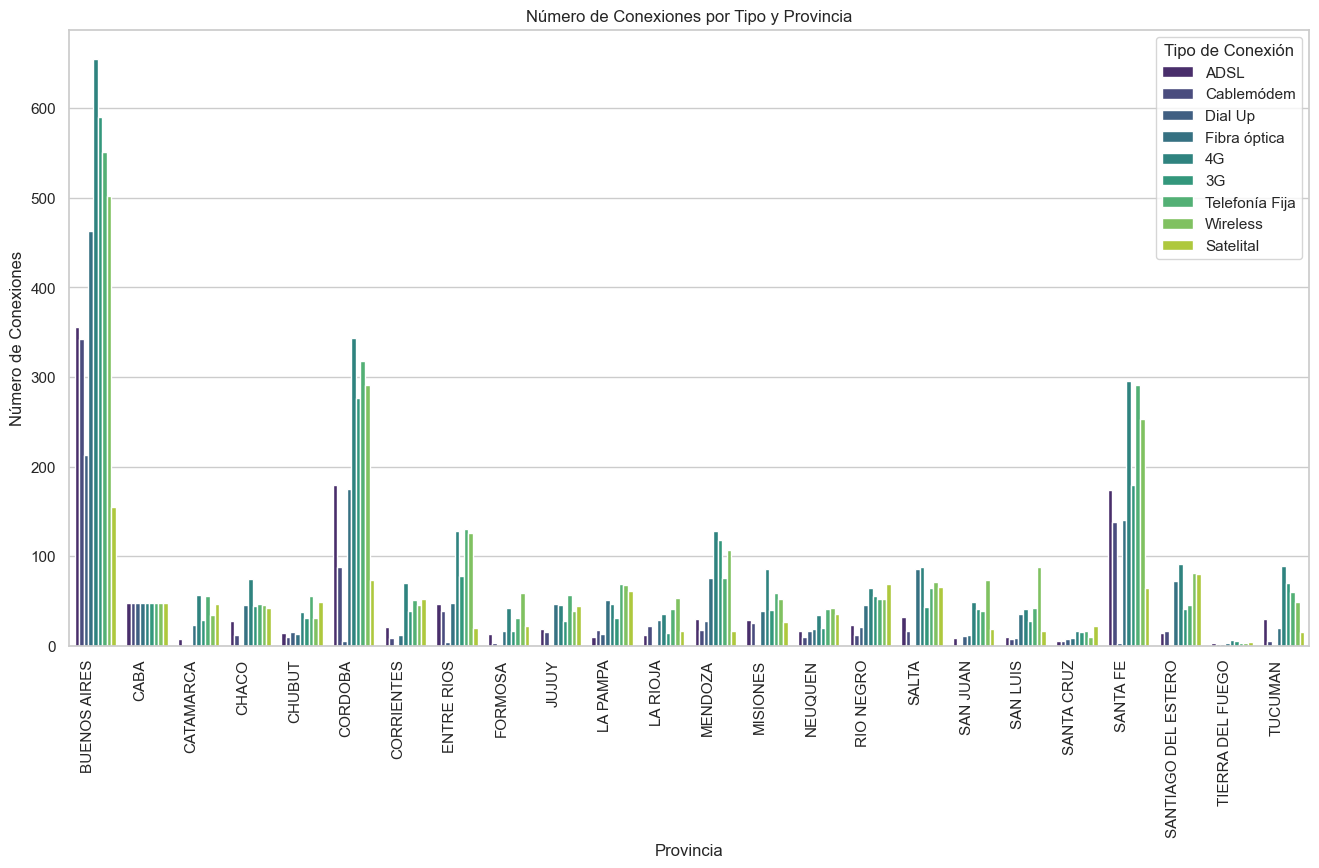

In [300]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 8))

# Crear el gráfico de barras agrupadas
sns.barplot(data=internet_localidades.melt('Provincia', var_name='Tipo de Conexión', value_name='Número de Conexiones'), x='Provincia', y='Número de Conexiones', hue='Tipo de Conexión', palette='viridis')

# Personalizar el gráfico
plt.title('Número de Conexiones por Tipo y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Conexiones')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tipo de Conexión', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

*La tasa de crecimiento positiva de conexiones entre pares en diversas provincias de Argentina refleja un aumento significativo en el uso de internet y redes sociales. Con cifras que superan el millón en la mayoría de las provincias, notamos disparidades, como en Córdoba, Santa Fe y Buenos Aires, que lideran en conectividad. Sin embargo, provincias como Santiago del Estero, Chubut y Formosa presentan niveles más bajos, posiblemente debido a desafíos de infraestructura y factores socioeconómicos. Se sugiere que el gobierno implemente medidas para mejorar la accesibilidad, especialmente en áreas menos desarrolladas, mientras que las empresas podrían considerar programas de empoderamiento digital para grupos vulnerables. Este enfoque integral promovería la equidad en el acceso a la tecnología y fortalecería la inclusión digital en todo el país.*

------

# *KPIS Y FINANZAS*

### Dataset 10: Ingresos trimestrales por la prestación del servicio de Internet fijo.
- **Ingresos trimestrales de los operadores por el servicio de Internet fijo.**

In [301]:
internet_ingresos = pd.read_csv('DATA/Dataset_10_Internet_Ingresos.csv') # Cargamos el dataset.
internet_ingresos.head() # Mostramos el dataset.

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


In [302]:
internet_ingresos.info() # Mostramos la informacion del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [303]:
# Guardamos el dataset en un archivo csv en la carpeta DASHBOARD/DATA para su posterior uso en el dashboard.
internet_ingresos.to_csv('DASHBOARD/DATA/Dataset_10_Internet_Ingresos.csv', index=False)

internet_ingresos.describe() # Mostramos la descripcion del dataset.

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,21.888889
std,2.618615,1.133893,19.239510
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.750000,6.750000
50%,2018.000000,2.500000,14.500000
75%,2020.000000,3.250000,32.500000
max,2022.000000,4.000000,72.000000


*El análisis de los datos sobre ingresos en miles de pesos a lo largo de los trimestres revela varias tendencias significativas. En promedio, los ingresos muestran un aumento constante, alcanzando su punto máximo en el cuarto trimestre de 2022. La variabilidad, medida por la desviación estándar, es relativamente alta, indicando cierta fluctuación trimestral. El rango entre el valor mínimo (registrado en 2014) y el máximo (en 2022) sugiere una amplia disparidad en los ingresos a lo largo del período analizado. Las medidas de posición, como el percentil 25% y el percentil 75%, indican que al menos el 50% de los trimestres tienen ingresos dentro de un rango de 6,750 a 32,500 miles de pesos. En resumen, a lo largo de estos trimestres, los ingresos tienden a aumentar, pero con cierta variabilidad, y el último trimestre de 2022 destaca como el período con los ingresos más altos.*

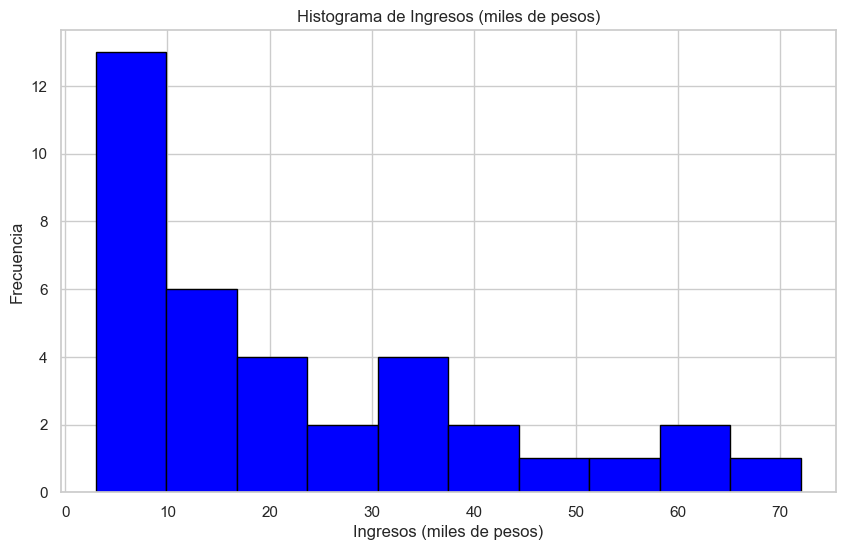

In [304]:
# Seleccionar la columna 'Ingresos (miles de pesos)' para el histograma
ingresos = internet_ingresos['Ingresos (miles de pesos)']

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(ingresos, bins=10, color='blue', edgecolor='black')  # Puedes ajustar el número de bins según tu preferencia
plt.title('Histograma de Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

*Podemos observar una clara distribución sesgada hacia la derecha en los ingresos a lo largo del tiempo. Esto sugiere que la mayoría de los trimestres tienen ingresos relativamente bajos, mientras que hay algunos trimestres con ingresos significativamente más altos, formando una cola hacia la derecha en la distribución. Este patrón indica una tendencia general de aumento en los ingresos a medida que avanzan los trimestres. La ausencia de valores atípicos sugiere que, aunque hay variabilidad en los ingresos, no existen trimestres con ingresos excepcionalmente altos o bajos que se desvíen significativamente de la tendencia general observada en la distribución.*

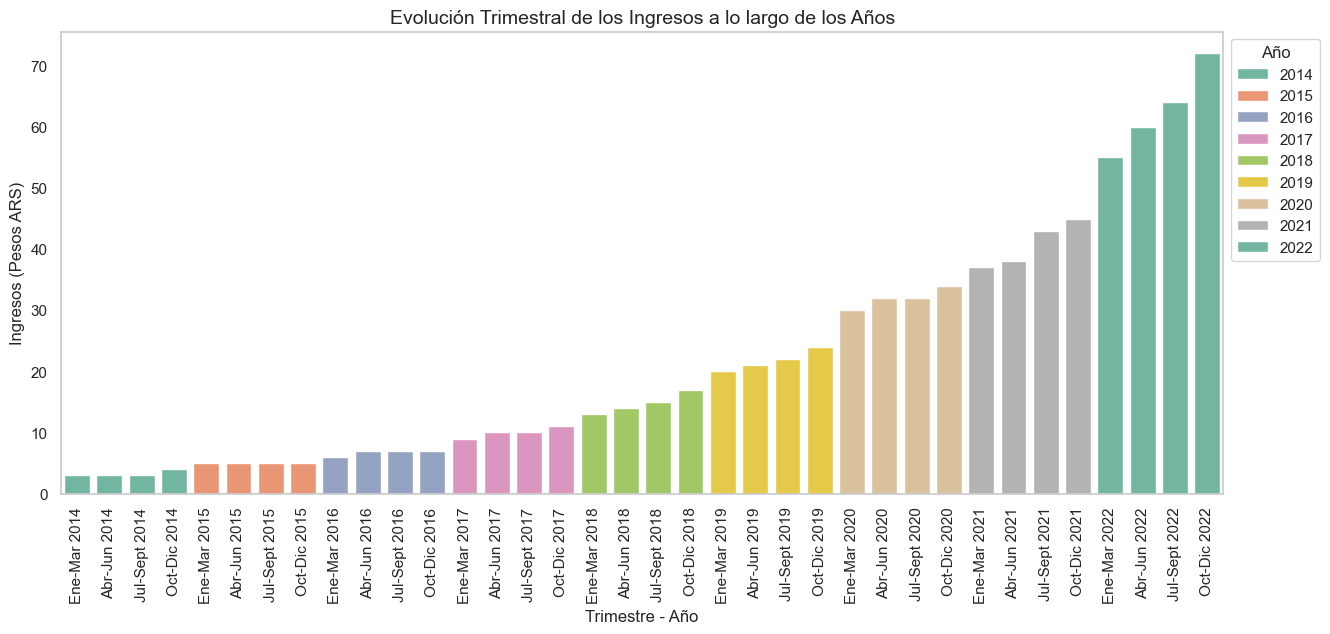

In [305]:
# Ordenar el DataFrame por 'Año' y 'Trimestre'
ingresos_trimestrales = internet_ingresos.sort_values(['Año', 'Trimestre'])

# Crear un gráfico de barras agrupadas con colores más vivos
plt.figure(figsize=(15, 6))
sns.barplot(data=ingresos_trimestrales, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', palette='Set2')

# Personalizar el aspecto del gráfico
plt.xlabel("Trimestre - Año", fontsize=12)
plt.ylabel("Ingresos (Pesos ARS)", fontsize=12)
plt.title("Evolución Trimestral de los Ingresos a lo largo de los Años", fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Año', bbox_to_anchor=(1, 1), loc='upper left')  # Mover la leyenda fuera del gráfico
plt.grid(axis='y')  # Agregar líneas de la cuadrícula en el eje y

# Mostrar el gráfico
plt.show()

*Los datos revelan una clara tendencia de crecimiento en los ingresos trimestrales a lo largo de los años, alcanzando su punto máximo en el último trimestre de 2022 con 72 miles de pesos. El año 2021 también muestra un aumento sostenido, destacándose el cuarto trimestre. Se observa una estacionalidad en los ingresos, con un patrón de incremento y disminución en los mismos trimestres a lo largo de los años. Sin embargo, el año 2018 muestra el menor crecimiento en comparación con los demás años. En resumen, la empresa experimenta un crecimiento general, con un fuerte impulso en 2022 y un desempeño especialmente destacado en el último trimestre de cada año.*

-------